In [100]:
import cv2
def show_rgb_image(image, title=None, conversion=cv2.COLOR_BGR2RGB):

    # Converts from one colour space to the other. this is needed as RGB
    # is not the default colour space for OpenCV
    image = cv2.cvtColor(image, conversion).copy()

    # Show the image
    plt.imshow(image)

    # remove the axis / ticks for a clean looking image
    plt.xticks([])
    plt.yticks([])

    # if a title is provided, show it
    if title is not None:
        plt.title(title)

    plt.show()

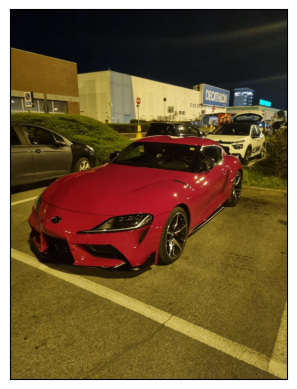

In [101]:
import numpy as np
import matplotlib.pyplot as plt


img = cv2.imread('../imgs/test_car.jpg')
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

show_rgb_image(img)

# Use HUE space

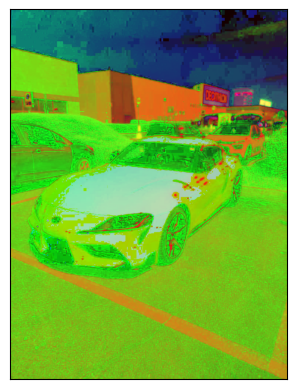

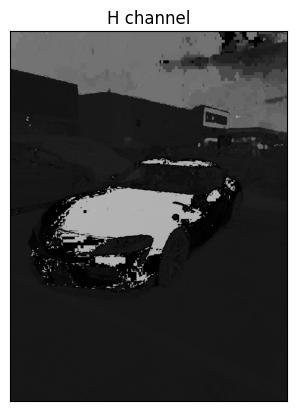

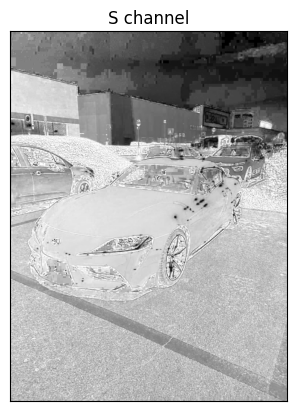

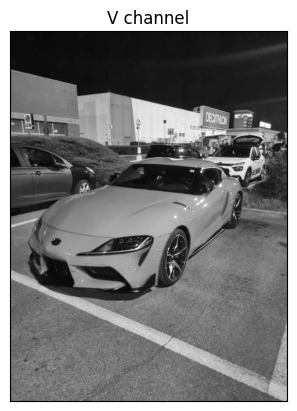

In [102]:
img = cv2.imread('../imgs/test_car.jpg')
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV).copy()

show_rgb_image(img_hsv)
show_rgb_image(img_hsv[:,:,0], 'H channel')
show_rgb_image(img_hsv[:,:,1], 'S channel')
show_rgb_image(img_hsv[:,:,2], 'V channel')

In [103]:
target_color_rgb = (10, 10, 10)

b, g, r = target_color_rgb      #[10, 50, 250]       # [10, 250, 10]
tar_color = np.zeros_like(img)
tar_color[:, :, 0] = b
tar_color[:, :, 1] = g
tar_color[:, :, 2] = r

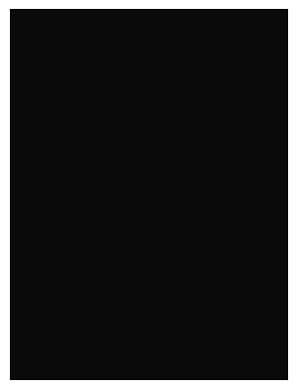

In [104]:
show_rgb_image(tar_color)

In [105]:
image_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
tar_hsv = cv2.cvtColor(tar_color, cv2.COLOR_BGR2HSV)

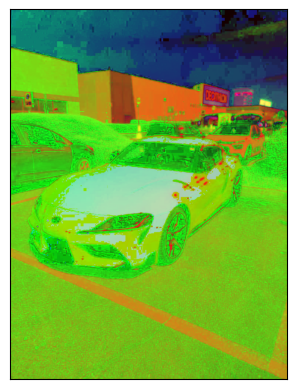

In [106]:
show_rgb_image(image_hsv)

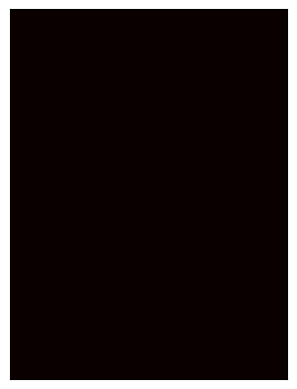

In [107]:
show_rgb_image(tar_hsv)

In [108]:
h_tar, s_tar, v_tar = cv2.split(tar_hsv)
h, s, v = cv2.split(image_hsv)

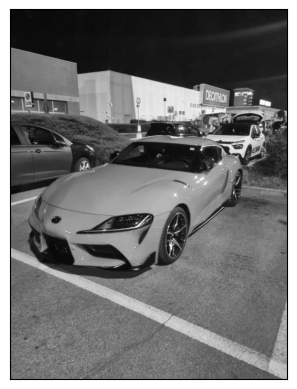

In [109]:
new_image = cv2.merge([h_tar, s_tar, v])

new_image = cv2.cvtColor(new_image, cv2.COLOR_HSV2BGR)
show_rgb_image(new_image)

# Use LAB space

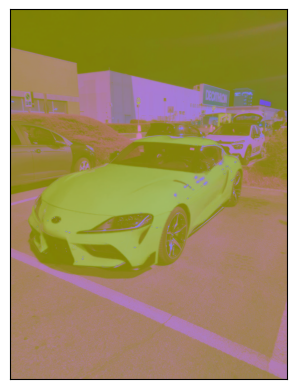

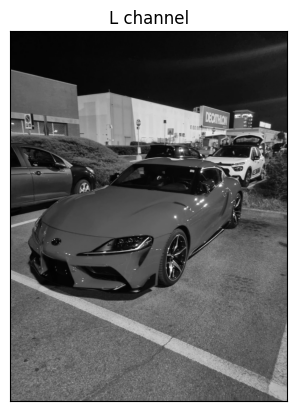

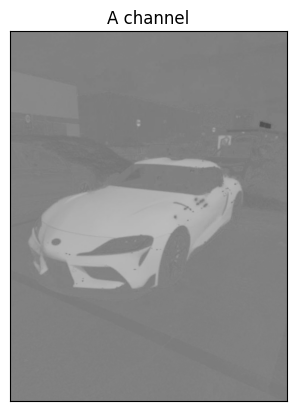

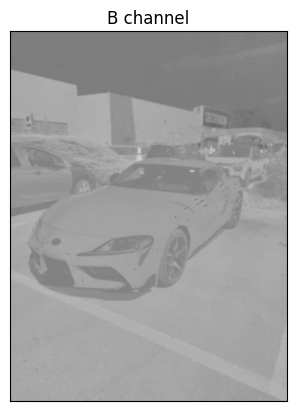

In [110]:
img = cv2.imread('../imgs/test_car.jpg')
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB).copy()

show_rgb_image(img_lab)
show_rgb_image(img_lab[:,:,0], 'L channel')
show_rgb_image(img_lab[:,:,1], 'A channel')
show_rgb_image(img_lab[:,:,2], 'B channel')

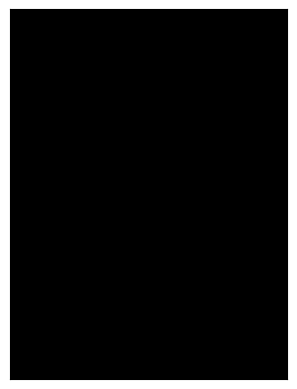

In [111]:
target_color_rgb = (0, 0, 0)

b, g, r = target_color_rgb      #[10, 50, 250]       # [10, 250, 10]
tar_color = np.zeros_like(img)
tar_color[:, :, 0] = b
tar_color[:, :, 1] = g
tar_color[:, :, 2] = r
show_rgb_image(tar_color)

In [112]:
image_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
tar_lab = cv2.cvtColor(tar_color, cv2.COLOR_BGR2LAB)

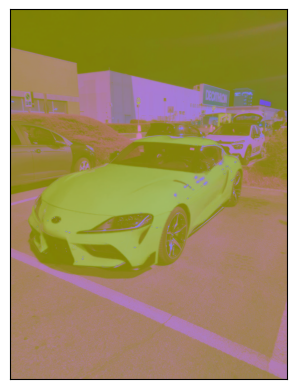

In [113]:
show_rgb_image(image_lab)

In [114]:
l_tar, a_tar, b_tar = cv2.split(tar_lab)
l, a, b = cv2.split(image_lab)

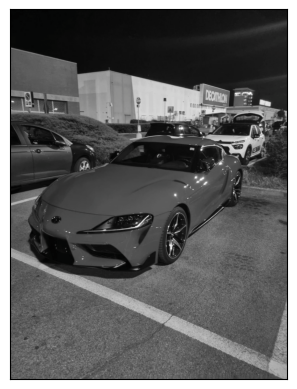

In [115]:
new_image = cv2.merge([l, a_tar, b_tar])

new_image = cv2.cvtColor(new_image, cv2.COLOR_LAB2BGR)
show_rgb_image(new_image)

# Magic funcrion

In [4]:
from PIL import Image
import cv2
import numpy as np

def similar(G1,B1,R1,G2,B2,R2):
    ar=[]
    if G2 > 30:
        ar.append(1000.*G1/G2)
    if B2 > 30:
        ar.append(1000.*B1/B2)
    if R2 > 30:
        ar.append(1000.*R1/R2)
    if len(ar) < 1:
        return False
    if min(ar) == 0:
        return False
    br = max(R1,G1,B1) / max(G2,B2,R2)
    return max(ar) / min(ar) < 1.55 and br > 0.7 and br < 1.4

def CFAR(G,B,R,g,b,r,pro,bri):
    ar=[]
    if g > 30:
        ar.append(G/g)
    if b > 30:
        ar.append(B/b)
    if r > 30:
        ar.append(R/r)
    if len(ar) == 0:
        return True
    if bri > 120 :
        return max(ar)/min(ar) < 2
    if bri < 70 :
        return max(ar)/min(ar) < 1.7
    if pro < 0.35 :
        return max(ar)/min(ar) < 1.6 and max(ar) > 0.8
    else :
        return max(ar)/min(ar) < 1.7 and max(ar) > 0.65

def vis_parsing_maps(im, origin, parsing_anno, stride, save_im=False, save_path='output.jpg', mod='gold'):

    vis_parsing_anno = parsing_anno.copy().astype(np.uint8)
    vis_parsing_anno = cv2.resize(vis_parsing_anno, None, fx=stride, fy=stride, interpolation=cv2.INTER_NEAREST)


    SB = 0
    SR = 0
    SG = 0
    cnt = 0
    total = 0
    brigh = 0
    FB = 0
    FR = 0
    FG = 0
    FN = 0
    for x in range(0, origin.shape[0]):
        for y in range(0, origin.shape[1]):
            _x = int(x * 512 / origin.shape[0])
            _y = int(y * 512 / origin.shape[1])
            if vis_parsing_anno[_x][_y] == 1:
                FB = FB + int(origin[x][y][0])
                FG = FG + int(origin[x][y][1])
                FR = FR + int(origin[x][y][2])
                FN = FN + 1
    FB = int(FB / FN)
    FR = int(FR / FN)
    FG = int(FG / FN)

    for x in range(0, origin.shape[0]):
        for y in range(0, origin.shape[1]):
            _x = int(x * 512 / origin.shape[0])
            _y = int(y * 512 / origin.shape[1])
            if vis_parsing_anno[_x][_y] == 17:
                OB = int(origin[x][y][0])
                OG = int(origin[x][y][1])
                OR = int(origin[x][y][2])
                if similar(OB,OG,OR,FB,FG,FR) :
                    continue
                SB = SB + OB
                SG = SG + OG
                SR = SR + OR
                cnt = cnt + 1
                brigh = brigh + OR + OG + OR
            if vis_parsing_anno[_x][_y] <= 17:
                total = total + 1
    pro = cnt / total
    SB = int(SB / cnt)
    SG = int(SG / cnt)
    SR = int(SR / cnt)
    brigh = brigh / cnt / 3

    for x in range(0, origin.shape[0]):
        for y in range(0, origin.shape[1]):
            _x = int(x * 512 / origin.shape[0])
            _y = int(y * 512 / origin.shape[1])
            if vis_parsing_anno[_x][_y] == 17:
                OB = int(origin[x][y][0])
                OG = int(origin[x][y][1])
                OR = int(origin[x][y][2])
                if similar(OB,OG,OR,FB,FG,FR) :
                    continue
                cur = origin[x][y]
                sum = int(cur[0]) + int(cur[1]) + int(cur[2])
                if mod=='gold':
                    GB = 0
                    GG = 215 * 0.8
                    GR = 255 * 0.8
                if mod=='red':
                    GB = 50
                    GG = 80
                    GR = 255
                if mod=='black':
                    GB = 100
                    GG = 110
                    GR = 125

                if brigh > 120 :
                    param = 20
                    p = (sum + param) * (sum + param) / (brigh + param) / (brigh + param) / 20
                elif brigh < 80 :
                    p = sum * 70 / 520 / brigh
                else :
                    p = sum / 520
                if CFAR(SB,SG,SR,cur[0],cur[1],cur[2],pro,brigh):
                    cur[0] = min(255, int(GB * p))
                    cur[1] = min(255, int(GG * p))
                    cur[2] = min(255, int(GR * p))

    if save_im:
        cv2.imwrite(save_path, origin, [int(cv2.IMWRITE_JPEG_QUALITY), 100])

img = Image.open('../imgs/test_car.jpg')
origin = cv2.imread('../imgs/test_car.jpg', cv2.IMREAD_UNCHANGED)
image = img.resize((512,512))

mask = np.zeros((origin.shape[0], origin.shape[1]), dtype=np.uint8)
# Draw a rectangle on the mask
cv2.rectangle(mask, (100, 100), (500, 500), (255, 255, 255), -1)

# replace the 1 values with 17 (the class we want to keep)
mask = np.where((mask==255), 17, mask)

# parsing = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
vis_parsing_maps(image, origin, mask, stride=1, save_im=True, save_path="../imgs/", mod="black")

ZeroDivisionError: division by zero